<a href="https://colab.research.google.com/github/simao-f/Deep-Learning-Assignment/blob/main/M4_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Applied Deep Learning Atrtificial Intelligence
1st Group assignment

Simao Ferreira
Elena Skrtic
Laura Keri


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

In [ ]:
# Load and Inspect Data
data_raw = pd.read_csv('Housing.csv')

In [ ]:
data_raw.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Feature Engineering

In [ ]:
#one-hot encoding
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

#Drop unecessary columns & Defining the new dataset
housing_data_encoded = pd.get_dummies(data_raw, columns=categorical_columns, drop_first=True)
housing_data_encoded.drop(columns=['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'])

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1,0,0,0,1,1,0,0
1,1,0,0,0,1,0,0,0
2,1,0,1,0,0,1,1,0
3,1,0,1,0,1,1,0,0
4,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
540,1,0,1,0,0,0,0,1
541,0,0,0,0,0,0,1,0
542,1,0,0,0,0,0,0,1
543,0,0,0,0,0,0,0,0


In [ ]:
#Define the scaler and divide cateogrical from numerical data
scaler = MinMaxScaler()
numerical_col = data_raw[['price', 'area']]

#Scaling
data_scaled = scaler.fit_transform(numerical_col)
data_s = pd.DataFrame(data_scaled, columns=['price_scaled', 'area_scaled'] )


In [ ]:
#Merge back the scaled data with the rest
merged_data = pd.concat([data_s,housing_data_encoded], axis=1)
final_data = merged_data.drop(columns=['price', 'area'])

In [ ]:
final_data.head()

,price_scaled,area_scaled,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.000000,0.396564,4,2,3,2,1,0,0,0,1,1,0,0
1,0.909091,0.502405,4,4,4,3,1,0,0,0,1,0,0,0
2,0.909091,0.571134,3,2,2,2,1,0,1,0,0,1,1,0
3,0.906061,0.402062,4,2,2,3,1,0,1,0,1,1,0,0
4,0.836364,0.396564,4,1,2,2,1,1,1,0,1,0,0,0


# Train-Test Split

Splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = final_data[['price_scaled', 'area_scaled', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_semi-furnished']].values
y = final_data['furnishingstatus_unfurnished'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining a Neural Network Architecture in Pytorch

In [ ]:
# Convert to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
X_train_tensor[0]

tensor([0.5000, 0.2990, 3.0000, 2.0000, 4.0000, 1.0000, 1.0000, 0.0000, 0.0000,
        0.0000, 1.0000, 0.0000, 0.0000])

# Experimenting with Different Hyperparameters

In [ ]:
# Initializing Hyperparameters
epochs = 10
learning_rate = 0.05

# # Initializing Parameters
# w = 50

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net3 = torch.nn.Sequential(
    torch.nn.Linear(13, 10),  # Adjusted from 4 to 13 to match the dataset
    torch.nn.ReLU(),
    torch.nn.Dropout(0.10),
    torch.nn.Linear(10, 1),
    torch.nn.Sigmoid()
)

# 1.2 Loss Function
loss_BCE = torch.nn.BCELoss()


# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_net3.parameters(), lr=learning_rate)


loss_set = {}
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):
        # Forward Pass
        output = model_net3(X_train_tensor[i].reshape(1, -1))  # Using reshape(1, -1) for flexibility

        # FeedForward Evaluation
        loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
        optimizer.zero_grad()

        # Backward Pass / Gradient Calculation
        loss.backward()
        # Back Propagation / Update Weights
        optimizer.step()

        # Store the loss for each epoch
        epoch_loss += loss.item()

    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")


<ipython-input-63-71dd7f4bc344>:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.5431
--------------------------------------------------


Epoch 2 Average Loss: 0.4584
--------------------------------------------------


Epoch 3 Average Loss: 0.4183
--------------------------------------------------


Epoch 4 Average Loss: 0.4089
--------------------------------------------------


Epoch 5 Average Loss: 0.3864
--------------------------------------------------


Epoch 6 Average Loss: 0.3975
--------------------------------------------------


Epoch 7 Average Loss: 0.3806
--------------------------------------------------


Epoch 8 Average Loss: 0.3928
--------------------------------------------------


Epoch 9 Average Loss: 0.3860
--------------------------------------------------


Epoch 10 Average Loss: 0.3798
--------------------------------------------------



# Evaluating the Final Model on the Test Data

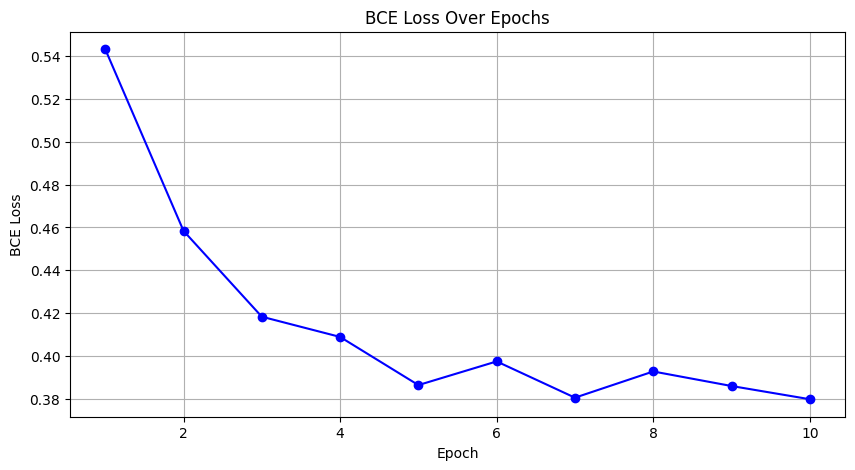

In [ ]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('BCE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.grid(True)
plt.show()

This shows that the model is learning as expected, because the BCE loss is decreasing. It means that the training process for the furnished rooms is being effective.

In [ ]:
# save the trained model
torch.save(model_net3, 'model_net3.pkl')

In [ ]:
# Lets load the model for inference

model_net3_trained = torch.load('model_net3.pkl')

# Set the Model to Evaluation Mode
model_net3_trained.eval()

Sequential(
  (0): Linear(in_features=13, out_features=10, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.1, inplace=False)
  (3): Linear(in_features=10, out_features=1, bias=True)
  (4): Sigmoid()
)

In [ ]:
# Initialize a variable to store the total loss
total_loss = 0.0

# Initialize a variable to store all the predictions
all_predictions = []

# Loop over each sample in the test dataset
for i in range(X_test_tensor.size(0)):

    # Forward pass: compute predicted y by passing x to the model
    output = model_net3(X_test_tensor[i].reshape(-1))

    # Compute and print loss
    loss = loss_BCE(output, y_test_tensor[i].reshape(-1))
    total_loss += loss.item()

    # Store the predictions
    all_predictions.append(output.detach().numpy())

# Calculate the average loss over all test samples
average_loss = total_loss / X_test_tensor.size(0)
print(f'Average Loss on Test Set: {average_loss:.4f}')

# Convert all_predictions to a tensor for further calculations
all_predictions_tensor = torch.tensor(all_predictions).squeeze()


Average Loss on Test Set: 0.4631


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[53 15]
 [18 23]]


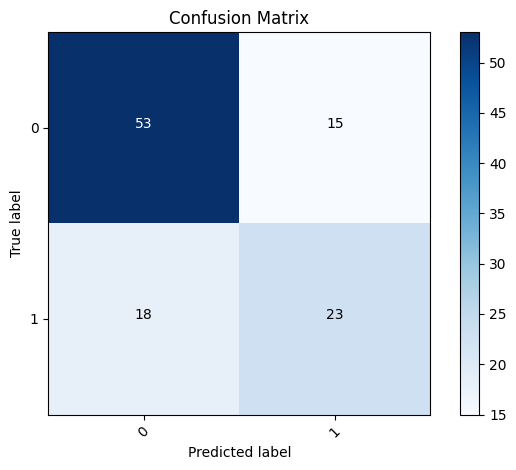

In [ ]:
# Convert predicted probabilities to binary labels
threshold = 0.70
predicted_labels = (all_predictions_tensor > threshold).long()

# Calculate confusion matrix
cm = confusion_matrix(y_test_tensor.numpy(), predicted_labels.numpy())

# Plot confusion matrix
plot_confusion_matrix(cm, classes=[0, 1], title='Confusion Matrix')
plt.show()

In [ ]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.6972477064220184

In [ ]:
# Print the parameters of all layers
for name, param in model_net3_trained.named_parameters():
    print(f"Layer: {name}")
    print(f"Size: {param.size()}")
    print(f"Values: \n{param.data}\n")

Layer: 0.weight
Size: torch.Size([10, 13])
Values: 
tensor([[ 0.2898, -0.2569, -0.2310,  0.0564,  0.3606,  0.1913,  0.1273,  0.0324,
          0.2606,  0.2436,  0.2421,  0.1396,  1.0417],
        [-0.3163, -0.1518,  0.3195,  0.2411, -0.3000, -0.5726,  0.2584, -0.0555,
         -0.3457, -0.2996, -0.1786, -0.0963, -0.5705],
        [ 0.1748, -0.1046, -0.2240, -0.1612,  0.0656, -0.0889,  0.1555, -0.3293,
          0.4727,  0.3036,  0.0305, -0.0256,  2.7048],
        [ 0.0435,  0.2320, -0.0954, -0.2233,  0.0813, -0.4378, -0.0883, -0.0284,
          0.0363, -0.1345,  0.0250, -0.0775, -0.7396],
        [ 0.1604,  0.0438, -0.1454, -0.1781,  0.0503,  0.0315, -0.1229, -0.1574,
         -0.1389, -0.0799, -0.0090,  0.1146,  2.9580],
        [ 0.5068, -0.1730, -0.1632, -0.0230,  0.1703,  0.4182,  0.1239, -0.0748,
          0.5854,  0.0779,  0.2507,  0.0571,  1.2210],
        [-0.0845,  0.0905,  0.1914,  0.1101, -0.5151, -0.8013, -0.3037, -0.1124,
         -0.5336, -0.1401, -0.2265, -0.1404, -0.830